<a href="https://colab.research.google.com/github/AYA0HASSAN/ArabicAbusiveWordDetection/blob/main/Abusive_Word_Detection_V03.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Project : Abusive Word Detection
Version : 2
Author : Aya Hassan , Salama Hegazy , Arwa , Nancy , Osama



Import Libraries 

In [ ]:
import re
import numpy as np
import pandas as pd
import seaborn as sns
import nltk 
nltk.download("all")
from nltk.tokenize import word_tokenize

[nltk_data] Downloading collection 'all'
[nltk_data]    | 
[nltk_data]    | Downloading package abc to C:\Users\Aya
[nltk_data]    |     Hassan\AppData\Roaming\nltk_data...
[nltk_data]    |   Package abc is already up-to-date!
[nltk_data]    | Downloading package alpino to C:\Users\Aya
[nltk_data]    |     Hassan\AppData\Roaming\nltk_data...
[nltk_data]    |   Package alpino is already up-to-date!
[nltk_data]    | Downloading package averaged_perceptron_tagger to
[nltk_data]    |     C:\Users\Aya Hassan\AppData\Roaming\nltk_data...
[nltk_data]    |   Package averaged_perceptron_tagger is already up-
[nltk_data]    |       to-date!
[nltk_data]    | Downloading package averaged_perceptron_tagger_ru to
[nltk_data]    |     C:\Users\Aya Hassan\AppData\Roaming\nltk_data...
[nltk_data]    |   Package averaged_perceptron_tagger_ru is already
[nltk_data]    |       up-to-date!
[nltk_data]    | Downloading package basque_grammars to C:\Users\Aya
[nltk_data]    |     Hassan\AppData\Roaming\nltk_

In [ ]:
# ! pip install gensim

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import string
from wordcloud import WordCloud
from nltk.corpus import stopwords
stopwords_list = stopwords.words('arabic')
import arabic_reshaper
from bidi.algorithm import get_display
import string
string.punctuation
# import gensim
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.svm import SVC
# from xgboost import XGBClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import precision_recall_fscore_support
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix  
from sklearn.metrics import plot_confusion_matrix

Load Dataset

In [ ]:
train_df = pd.read_csv('Data/hate_abuse_1/train.csv',encoding = "UTF-8")
test_df = pd.read_csv('Data/hate_abuse_1/test.csv',encoding = "UTF-8")
train_df.head()

,Tweet,Class
0,وزير الخارجية اللبناني جبران باسيل قال في سلسل...,normal
1,سورية بلد الحضارات تربطها بعلية او بحيوان,normal
2,اخي الحاج اذا شعرت انك محرجا من الانتقادات لتص...,normal
3,ما فيك تعيش بلا ما تكب فتن ليل نهار وبكرة قلهم...,normal
4,هذا البطل الذي قاتل وجاذف بحياته لتحيا انت يا ...,abusive


## EDA

In [ ]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4676 entries, 0 to 4675
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   Tweet   4676 non-null   object
 1   Class   4676 non-null   object
dtypes: object(2)
memory usage: 73.2+ KB


In [ ]:

print("Number of Category : ",len(pd.unique(train_df['Class'])))
print("==========================================================================")
print("Number of  value In Each Category :\n",train_df['Class'].value_counts())

Number of Category :  3
Number of  value In Each Category :
 normal     2920
abusive    1382
hate        374
Name: Class, dtype: int64


In [ ]:
train_df["Tweet_Len"] = train_df["Tweet"].apply(lambda x: len(x.split(' ')))
train_df.head()

,Tweet,Class,Tweet_Len
0,وزير الخارجية اللبناني جبران باسيل قال في سلسل...,normal,18
1,سورية بلد الحضارات تربطها بعلية او بحيوان,normal,7
2,اخي الحاج اذا شعرت انك محرجا من الانتقادات لتص...,normal,16
3,ما فيك تعيش بلا ما تكب فتن ليل نهار وبكرة قلهم...,normal,15
4,هذا البطل الذي قاتل وجاذف بحياته لتحيا انت يا ...,abusive,13


Max and Min Length of Tweets

In [ ]:
print("Min. Length of Tweets =  ",train_df["Tweet_Len"].min())
# 1
print("Number of tweets that have only one word = ",len(train_df[train_df["Tweet_Len"]==train_df["Tweet_Len"].min()]))
# 7

Min. Length of Tweets =   1
Number of tweets that have only one word =  7


In [ ]:
train_df[train_df["Tweet_Len"]==train_df["Tweet_Len"].min()]

,Tweet,Class,Tweet_Len
1281,مشكور,normal,1
1477,قوية,normal,1
1878,هتلر,normal,1
2007,حمير,hate,1
2591,آحا,normal,1
3109,وقح,abusive,1
3401,ياعاهرة,abusive,1


In [ ]:
print("Max. Length of Tweets =  ",train_df["Tweet_Len"].max())
# 52
print("Number of tweets that have 52 words = ",len(train_df[train_df["Tweet_Len"]==train_df["Tweet_Len"].max()]))
# 2

Max. Length of Tweets =   52
Number of tweets that have 52 words =  2


In [ ]:
train_df[train_df["Tweet_Len"]==train_df["Tweet_Len"].max()]

,Tweet,Class,Tweet_Len
3017,يلا طلع لي بقلبك ما حدا معبرك مبارح كنت عم تها...,normal,52
4618,لعنة الله على قاتل السوريين و ليش ما تتكلم عن ...,normal,52


<AxesSubplot:>

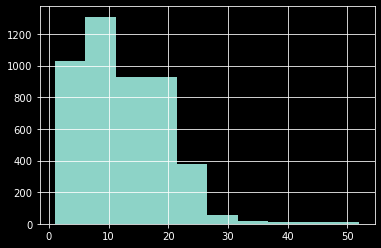

In [ ]:
# Distribution of Length of words in each tweet
train_df["Tweet_Len"].hist()

c:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Tweet_Len', ylabel='count'>

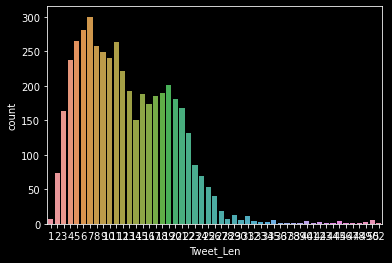

In [ ]:
sns.countplot(train_df['Tweet_Len'])


c:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Class', ylabel='count'>

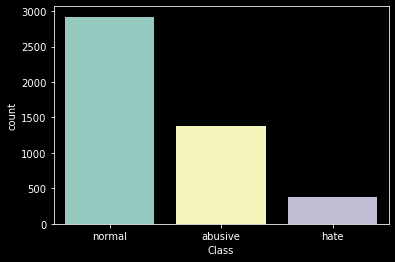

In [ ]:
sns.countplot(train_df['Class'])


### clearly we have Unbalanced Data

#### check for Null Data

In [ ]:
train_df.isnull().sum()

Tweet        0
Class        0
Tweet_Len    0
dtype: int64

#### Checking for Duplicates

In [ ]:
# new dataframe that is free from Duplicates
print("Number of Duplicats :",train_df.duplicated().sum())
print("Removing Duplicats ......")
train_df = train_df.drop_duplicates()
print("Number of Duplicats :",train_df.duplicated().sum())
train_df.info()

Number of Duplicats : 50
Removing Duplicats ......
Number of Duplicats : 0
<class 'pandas.core.frame.DataFrame'>
Int64Index: 4626 entries, 0 to 4675
Data columns (total 3 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   Tweet      4626 non-null   object
 1   Class      4626 non-null   object
 2   Tweet_Len  4626 non-null   int64 
dtypes: int64(1), object(2)
memory usage: 144.6+ KB


In [ ]:
# number of entries in Original dataframe = 4676
# number of entries in dataframe after removig Duplicates  = 4626
print("Number of Duplicates(removed) Entries = ",4676 - 4626)

Number of Duplicates(removed) Entries =  50


### Preprocessing 

In [ ]:

# - Remove Punctuation
def remove_punctuation(text):
    without_punctuation ="".join(i for i in text if i not in string.punctuation)
    return without_punctuation

# - Remove Numbers
def remove_numbers(text):
    nums = re.compile(r'\d+')
    clean_text = nums.sub(r'',text)
    return clean_text

# - Remove Stopwords
arabic_stopwords = nltk.corpus.stopwords.words('arabic')

def remove_stopwords(text):
    not_stopword = [i for i in text  if i not in arabic_stopwords]
    return not_stopword


def clear_tweet(text):
    tokens = remove_stopwords(word_tokenize(remove_punctuation(remove_numbers(text))))
    return tokens

In [ ]:
train_df["Tokens"] = train_df['Tweet'].apply(lambda x: clear_tweet(x))
train_df['Tokens']

0       [وزير, الخارجية, اللبناني, جبران, باسيل, قال, ...
1       [سورية, بلد, الحضارات, تربطها, بعلية, او, بحيوان]
2       [اخي, الحاج, اذا, شعرت, انك, محرجا, الانتقادات...
3       [فيك, تعيش, بلا, تكب, فتن, ليل, نهار, وبكرة, ق...
4       [البطل, قاتل, وجاذف, بحياته, لتحيا, انت, واطي,...
                              ...                        
4670    [جبران, باسيل, بسوق, الساسة, سعره, اقل, لبناني...
4671    [كول, هوا, مرة, تانيي, وحلوا, طيزو, وطيزنا, وم...
4672    [رئيس, روحي؟, تروح, روحك, انت, وكل, مين, شدّ, ...
4674    [خليك, بحالك, نعيمي, أساس, مش, مرتزق, طبل, فشخ...
4675    [عيلة, كتاب, عدل, اشقاء, بالنتائج, الاخيرة, غر...
Name: Tokens, Length: 4626, dtype: object

In [ ]:
train_df.head()


,Tweet,Class,Tweet_Len,Tokens
0,وزير الخارجية اللبناني جبران باسيل قال في سلسل...,normal,18,"[وزير, الخارجية, اللبناني, جبران, باسيل, قال, ..."
1,سورية بلد الحضارات تربطها بعلية او بحيوان,normal,7,"[سورية, بلد, الحضارات, تربطها, بعلية, او, بحيوان]"
2,اخي الحاج اذا شعرت انك محرجا من الانتقادات لتص...,normal,16,"[اخي, الحاج, اذا, شعرت, انك, محرجا, الانتقادات..."
3,ما فيك تعيش بلا ما تكب فتن ليل نهار وبكرة قلهم...,normal,15,"[فيك, تعيش, بلا, تكب, فتن, ليل, نهار, وبكرة, ق..."
4,هذا البطل الذي قاتل وجاذف بحياته لتحيا انت يا ...,abusive,13,"[البطل, قاتل, وجاذف, بحياته, لتحيا, انت, واطي,..."


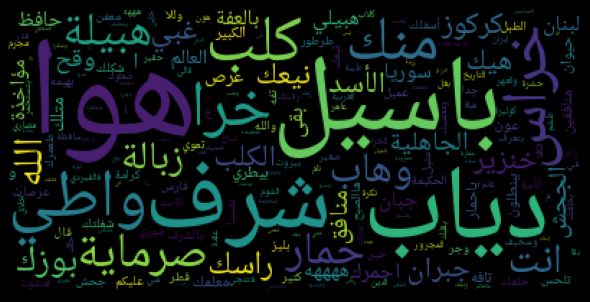

In [ ]:

text = ""
for i in train_df[train_df.Class == 'abusive'].Tokens.values:
    text = text + " " + i.pop()
reshaped_text = arabic_reshaper.reshape(text)
bidi_text = get_display(reshaped_text)
wordcloud = WordCloud(font_path='NotoNaskhArabic-Regular.ttf' , stopwords = set(stopwords_list)).generate(bidi_text)
plt.figure(figsize = (8, 8), facecolor = None)
plt.imshow(wordcloud)
plt.axis("off")
plt.tight_layout(pad = 0)
 
plt.show()

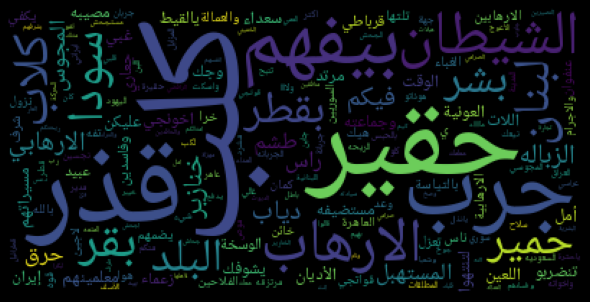

In [ ]:

text = ''
for i in train_df[train_df.Class == 'hate'].Tokens.values:
    text = text + " " + i.pop()
reshaped_text = arabic_reshaper.reshape(text)
bidi_text = get_display(reshaped_text)
wordcloud = WordCloud(font_path='NotoNaskhArabic-Regular.ttf' , stopwords = set(stopwords_list)).generate(bidi_text)
plt.figure(figsize = (8, 8), facecolor = None)
plt.imshow(wordcloud)
plt.axis("off")
plt.tight_layout(pad = 0)
 
plt.show()

#### Label Encoding

In [ ]:
lable_encoder = preprocessing.LabelEncoder()
encoded_labels =lable_encoder.fit_transform(train_df["Class"])
train_df['Class']=encoded_labels
train_df.head()

,Tweet,Class,Tweet_Len,Tokens
0,وزير الخارجية اللبناني جبران باسيل قال في سلسل...,2,18,"[وزير, الخارجية, اللبناني, جبران, باسيل, قال, ..."
1,سورية بلد الحضارات تربطها بعلية او بحيوان,2,7,"[سورية, بلد, الحضارات, تربطها, بعلية, او, بحيوان]"
2,اخي الحاج اذا شعرت انك محرجا من الانتقادات لتص...,2,16,"[اخي, الحاج, اذا, شعرت, انك, محرجا, الانتقادات..."
3,ما فيك تعيش بلا ما تكب فتن ليل نهار وبكرة قلهم...,2,15,"[فيك, تعيش, بلا, تكب, فتن, ليل, نهار, وبكرة, ق..."
4,هذا البطل الذي قاتل وجاذف بحياته لتحيا انت يا ...,0,13,"[البطل, قاتل, وجاذف, بحياته, لتحيا, انت, واطي,..."


c:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Class', ylabel='count'>

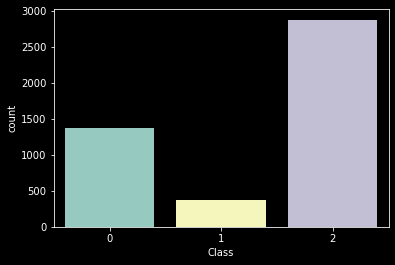

In [ ]:
sns.countplot(train_df['Class'])

#### Spliting Data Train/Validation

In [ ]:
X_train, X_val, y_train, y_val = train_test_split(train_df['Tweet'], train_df['Class'], test_size=0.2, stratify=train_df['Class'])

### Modeling

#### TFIDF (Uni,Bi,Tri)Gram

In [ ]:

def tfidf_ngram(n_gram,X_train,X_val):
    vectorizer = TfidfVectorizer(ngram_range=(n_gram,n_gram))
    x_train_vec = vectorizer.fit_transform(X_train)
    x_val_vec = vectorizer.transform(X_val)
    return x_train_vec,x_val_vec



In [ ]:
tfidf_1gram_transformation_train,tfidf_1gram_transformation_val= tfidf_ngram(1,X_train,X_val)
tfidf_2gram_transformation_train,tfidf_2gram_transformation_val= tfidf_ngram(2,X_train,X_val)
tfidf_3gram_transformation_train,tfidf_3gram_transformation_val= tfidf_ngram(3,X_train,X_val)

# ML Models
models=[LogisticRegression(),SVC(),RandomForestClassifier(),DecisionTreeClassifier()]


In [ ]:
models=[LogisticRegression(),SVC(),RandomForestClassifier(),DecisionTreeClassifier()]

#### Machine Learning Models

##### UniGram TFIDF

Results of  LogisticRegression()
Train Accuracy 0.8678378378378379
Test Accuracy 0.7526997840172787
Results of  SVC()
Train Accuracy 0.975945945945946
Test Accuracy 0.7408207343412527
Results of  RandomForestClassifier()
Train Accuracy 0.9989189189189189
Test Accuracy 0.7613390928725702
Results of  DecisionTreeClassifier()
Train Accuracy 0.9991891891891892
Test Accuracy 0.6954643628509719


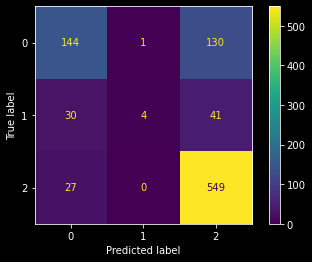

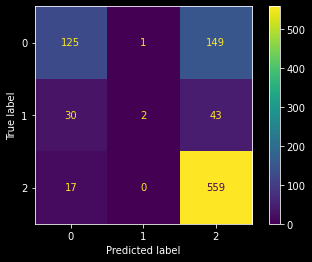

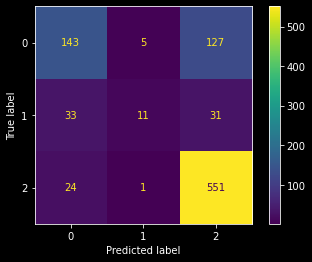

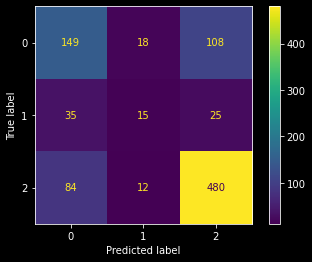

In [ ]:
for m in models :
    m.fit(tfidf_1gram_transformation_train,y_train)
    print("Results of ",str(m))
    print("Train Accuracy",m.score(tfidf_1gram_transformation_train,y_train))
    print("Test Accuracy",m.score(tfidf_1gram_transformation_val,y_val))
    plot_confusion_matrix(m, tfidf_1gram_transformation_val , y_val)
    

##### BiGram TFIDF

Results of  LogisticRegression()
Train Accuracy 0.8964864864864864
Test Accuracy 0.6965442764578834
Results of  SVC()
Train Accuracy 0.9708108108108108
Test Accuracy 0.6814254859611231
Results of  RandomForestClassifier()
Train Accuracy 0.9964864864864865
Test Accuracy 0.7138228941684666
Results of  DecisionTreeClassifier()
Train Accuracy 0.9964864864864865
Test Accuracy 0.6857451403887689


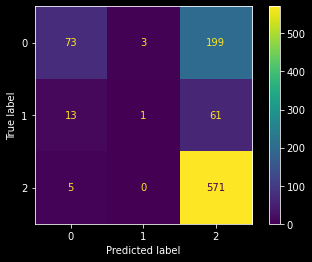

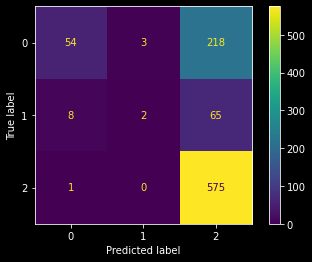

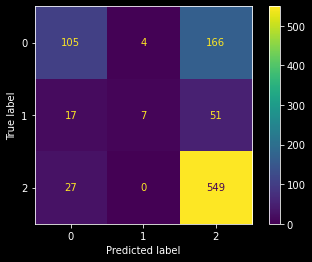

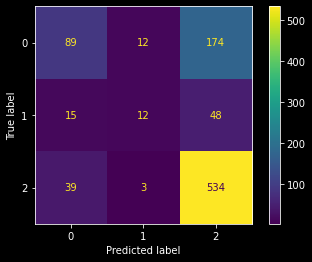

In [ ]:
for m in models :
    m.fit(tfidf_2gram_transformation_train,y_train)
    print("Results of ",str(m))
    print("Train Accuracy",m.score(tfidf_2gram_transformation_train,y_train))
    print("Test Accuracy",m.score(tfidf_2gram_transformation_val,y_val))
    plot_confusion_matrix(m, tfidf_2gram_transformation_val , y_val)
    



##### TriGram TFIDF

Results of  LogisticRegression()
Train Accuracy 0.9021621621621622
Test Accuracy 0.6360691144708424
Results of  SVC()
Train Accuracy 0.91
Test Accuracy 0.6328293736501079
Results of  RandomForestClassifier()
Train Accuracy 0.9848648648648649
Test Accuracy 0.6533477321814255
Results of  DecisionTreeClassifier()
Train Accuracy 0.9848648648648649
Test Accuracy 0.6468682505399568


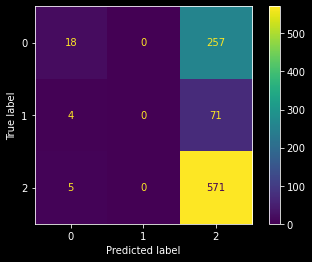

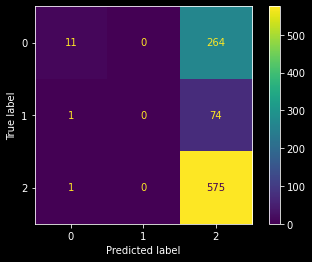

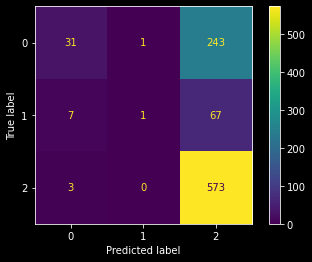

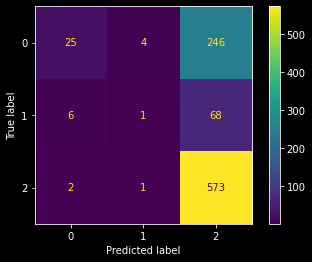

In [ ]:
for m in models :
    m.fit(tfidf_3gram_transformation_train,y_train)
    print("Results of ",str(m))
    print("Train Accuracy",m.score(tfidf_3gram_transformation_train,y_train))
    print("Test Accuracy",m.score(tfidf_3gram_transformation_val,y_val))
    plot_confusion_matrix(m, tfidf_3gram_transformation_val , y_val)